In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel


In [12]:
d=datasets.load_breast_cancer()

In [13]:
X=pd.DataFrame(d.data, columns=d.feature_names)
y=pd.Series(d.target)



In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4, random_state=0)



In [15]:
clf=RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=0)

In [16]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
y_pred=clf.predict(X_test)


In [18]:
accuracy_score(y_pred,y_test)

0.9342105263157895

In [19]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        80
           1       0.96      0.94      0.95       148

    accuracy                           0.93       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.94      0.93      0.93       228



In [21]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

No handles with labels found to put in legend.


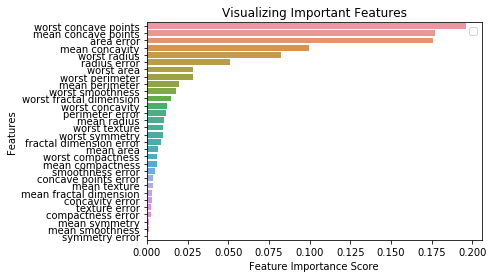

In [22]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [23]:
slf=SelectFromModel(clf,threshold=.15)

In [24]:
slf.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
        

In [25]:
for x in slf.get_support(indices=True):
    print(X.columns[x])

mean concave points
area error
worst concave points


In [26]:
X_important_train=slf.transform(X_train)
X_important_test=slf.transform(X_test)


In [27]:
clf2=RandomForestClassifier(n_estimators=40,random_state=0)

In [28]:
clf2.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
y_pre=clf2.predict(X_important_test)

In [30]:
accuracy_score(y_pre,y_test)

0.9210526315789473